In [1]:
!pip install rdflib


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for rdflib from https://files.pythonhosted.org/packages/d4/b0/7b7d8b5b0d01f1a0b12cc2e5038a868ef3a15825731b8a0d776cf47566c0/rdflib-7.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for isodate<0.7.0,>=0.6.0 from https://files.pythonhosted.org/packages/b6/85/7882d311924cbcfc70b1890780763e36ff0b140c7e51c110fc59a532f087/isodate-0.6.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/531.9 kB ? eta -:--:--
   -- ------------------------------------ 30.7/531.9 kB 640.0 kB/s eta 0:00:01
   ------------- -------------------------- 174.1/531.9 kB 2.1 MB/s eta 0:00:01
   ----------------------------------- ---- 471.0/531.9 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 531.9/531.9 kB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.7 kB ? eta -:--:--
   ---------------------------------------- 41.

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
!pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 14.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 15.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.0/305.0 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 21.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 16.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


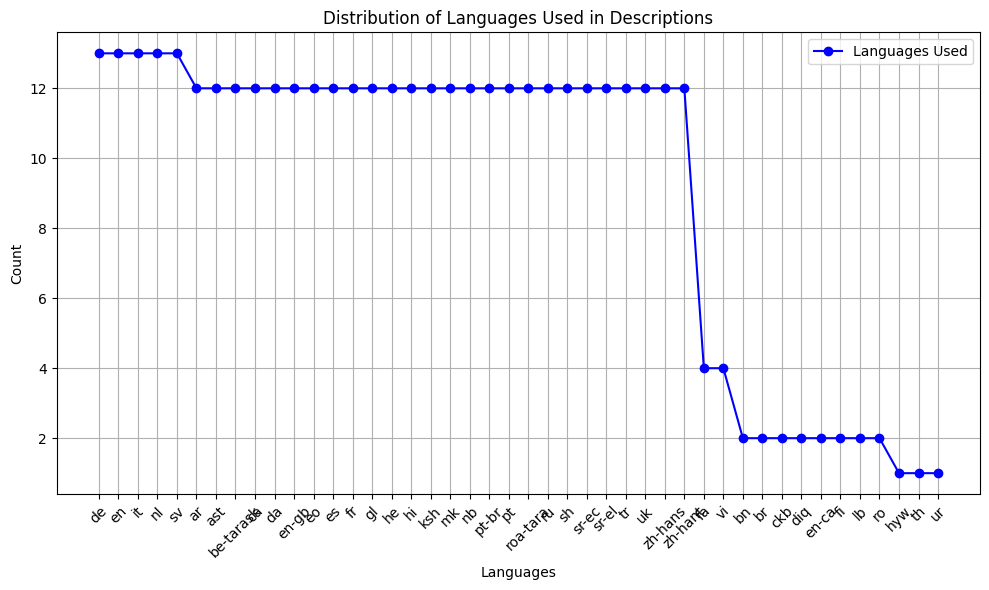

In [3]:
import rdflib
import matplotlib.pyplot as plt

# Load the RDF dataset
g = rdflib.Graph()
g.parse("dcatap.rdf", format="xml")

# Define the SPARQL query to count languages
query = """
PREFIX dc: <http://purl.org/dc/terms/>

SELECT (LANG(?description) AS ?lang) (COUNT(*) AS ?languageCount)
WHERE {
    ?subject dc:description ?description .
    FILTER(langMatches(lang(?description), '*'))
}
GROUP BY LANG(?description)
ORDER BY DESC(?languageCount)
"""

# Execute the query
results = g.query(query)

# Extracting data for plotting
languages = []
counts = []

for row in results:
    languages.append(row['lang'])
    counts.append(row['languageCount'].toPython())

# Plotting the data as a curve chart (line plot)
plt.figure(figsize=(10, 6))
plt.plot(languages, counts, marker='o', linestyle='-', color='b', label='Languages Used')
plt.xlabel('Languages')
plt.ylabel('Count')
plt.title('Distribution of Languages Used in Descriptions')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
